In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

### Creating Neural Network without hidden layers

In [3]:
 (X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(y_train)

60000

In [6]:
len(X_test)

10000

In [7]:
len(y_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

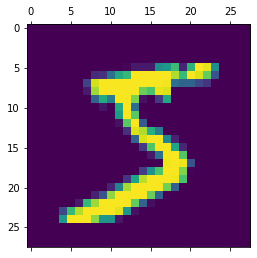

In [10]:
plt.matshow(X_train[0])

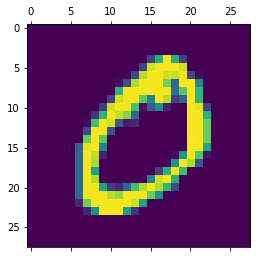

In [11]:
plt.matshow(X_train[1])

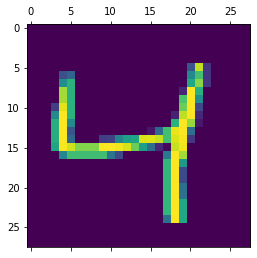

In [12]:
plt.matshow(X_train[2])

In [13]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [19]:
#scalling the values for better accuracy
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [21]:
X_train_flattened.shape

(60000, 784)

In [22]:
X_test_flattened.shape

(10000, 784)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4697 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3053 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9256


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9266


[0.2662522494792938, 0.9265999794006348]

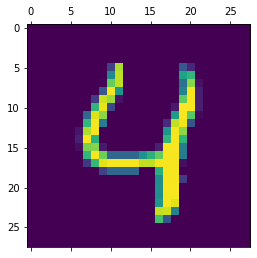

In [25]:
plt.matshow(X_test[4])

In [26]:
y_predict = model.predict(X_test_flattened)

In [27]:
#this will give values for all 10 values(0-9) and our prediction would be the one with max value.
y_predict[4]

array([2.1028399e-02, 4.9821192e-05, 9.2345595e-02, 3.5040379e-03,
       9.9147940e-01, 9.2267990e-03, 1.6109601e-01, 1.8524662e-01,
       2.9289833e-01, 7.1207017e-01], dtype=float32)

In [28]:
#now to get the max value
np.argmax(y_predict[4])

4

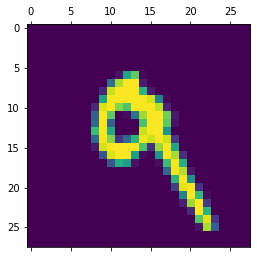

In [29]:
#first prediction is right. testing for another value.

plt.matshow(X_test[7])

In [30]:
np.argmax(y_predict[7])

9

In [ ]:
#This model is woring finne with accuracy of 92.66%

In [31]:
#getting exact predictions in new array
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
c_matrix = tensorflow.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
c_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    0,    5,   11,    3,    3,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  919,   19,    9,    4,   14,   10,   41,    4],
       [   2,    0,   15,  929,    1,   16,    3,   11,   26,    7],
       [   1,    1,    3,    1,  918,    0,   11,    4,   10,   33],
       [   8,    3,    1,   33,   12,  767,   20,    7,   34,    7],
       [   7,    3,    3,    1,    7,    8,  925,    2,    2,    0],
       [   1,    5,   21,    7,   10,    1,    0,  944,    2,   37],
       [   4,    9,    5,   19,   10,   21,   10,   10,  878,    8],
       [   9,    7,    1,   10,   31,    6,    0,   19,   10,  916]])>

Text(69.0, 0.5, 'Truth')

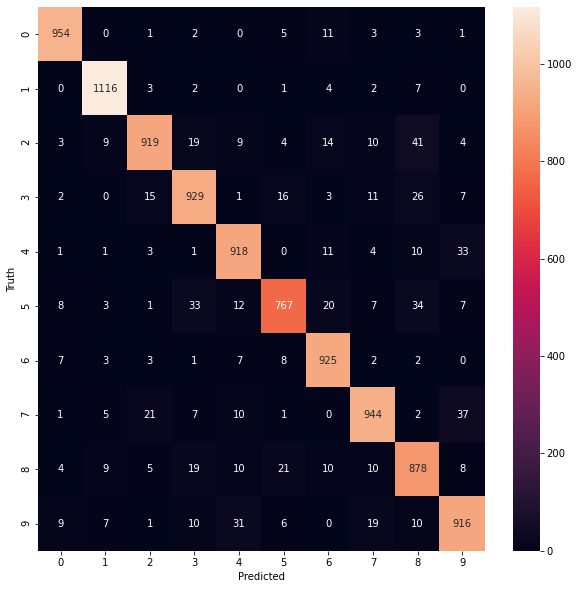

In [34]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Creating same Neural Network with hidden layers

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #Hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2706 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1237 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0670 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0524 - accuracy: 0.9840


In [40]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 912us/step - loss: 0.0805 - accuracy: 0.9742


[0.08045366406440735, 0.9742000102996826]

Text(69.0, 0.5, 'Truth')

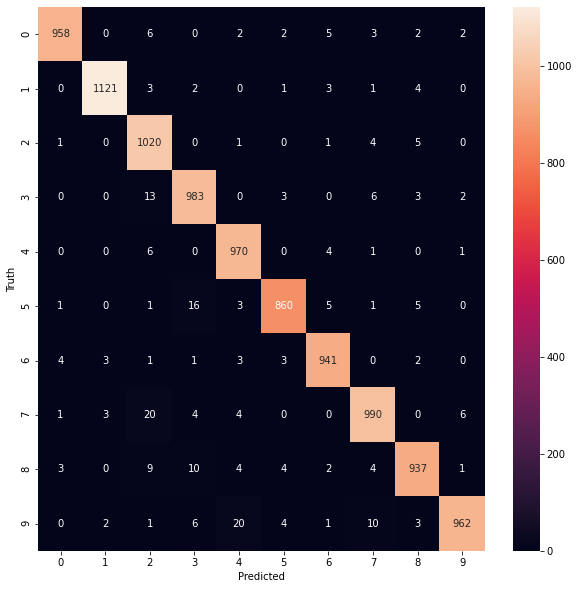

In [42]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
#Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2694 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1233 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0650 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0514 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

Text(69.0, 0.5, 'Truth')

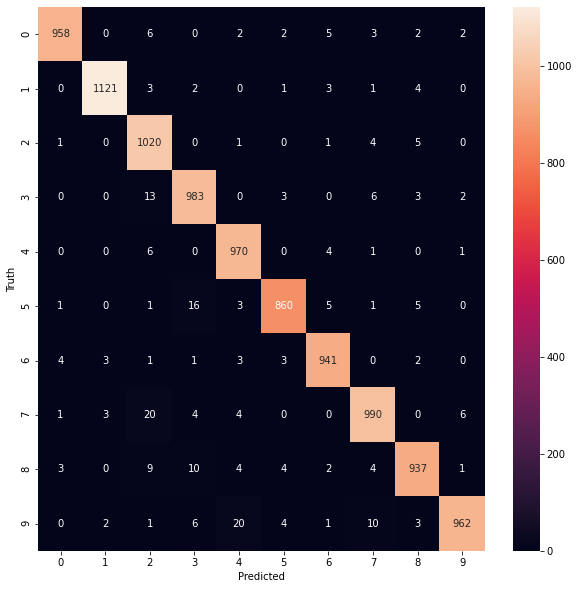

In [45]:
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9755


[0.09193918108940125, 0.9754999876022339]